## Méthode d'ensemble



Analogie à l'intelligence collective.
Si on agrège les prédictions d'un groupe de prédicteurs (classificateur où régresseur), on obtiendra souvent une meilleure prédiction qu'avec le meilleur des prédicteurs pris individuellement.

Quelques méthodes d'ensemble les plus populaires:
- Bagging: utilisation du même algorithme d'entrainement pour chaque prédicteur et à l'entrainer sur des sous-ensembles différents extraits aléatoirement du jeu d'entrainement. Particularité: le tirage s'effectue avec remise.

- Pasting: idem que Bagging, à l'exception que le tirage s'effectue sans remise
- Fôrets aléatoires: ensemble d'arbres de décision, chacuns entrainés sur un sous-ensemble aléatoire.
- Boosting
- Stacking: plutôt que d'aggréger les prédictions de tous les prédicteurs, on entraine un modèle final pour effectuer cette aggrégation. 

## Boosting

Le boosting désigne toute méthode d'ensemble qui peut combiner plusieurs mauvais élèves (c-à-d faire à peine mieux que de répondre au hasard) en un bon élève. L'idée générale de la plupart des méthodes de boosting est d'entrainer un prédicteur (modèle), l'un après l'autre, chacun s'efforçant de corriger son prédécesseur.
De nombreuses méthodes de boosting existent comme l'AdaBoost, le gradient boosting, etc ..

## AdaBoost

Pour un nouveau prédicteur, l'un des moyens de corriger son prédécesseur consiste à préter plus d'attention aux observations d'entrainement que ce prédecesseur a sous-ajusté. 
De cette façon les prédicteurs se concentrent sur les cas difficiles.

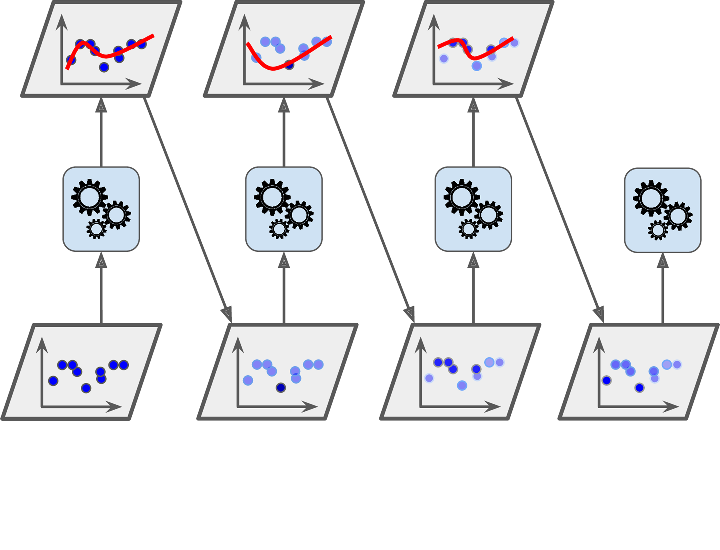

Chaque poids d'observation $ \omega^{(i)}$ vaut initialement $\frac{1}{m}$

Un premier prédicteur est entrainé et son taux d'erreur pondéré $r_{1}$ est calculé sur le jeu d'entrainement.

 ### Etape 1: Taux d erreur pondéré du j<sup>ième</sup> prédicteur
 
 $$ r_{j} = \displaystyle \frac{\sum \limits _{\substack{i=1 \\ \hat{y^{(i)}}_{j} \neq y^{(i)}}} ^{m} \omega^{(i)}}{\sum \limits _{i=1} ^{m} \omega^{(i)}} $$ où &ycirc;<sub>j</sub><sup>(i)</sup> est la prédiction du j<sup>ième</sup> pour la i<sup>ième</sup> observation

Total error = La somme des poids des instances mal classifiées.

### Etape 2: Poids du prédicteur

$$
\alpha_{j} = \eta * log(\frac{1 - r_{j}}{r_{j}})
$$

Le poids $\alpha_{j}$ du prédicteur est alors calculé en utilisant l'équation ci-dessus, où $\eta$ est l'hyperparamètre de taux d'apprentissage (learning rate, valeur par défaut = 1).
Plus le prédicteur est exact, plus son poids sera élévé. S'il ne fait que deviner au hasard, alors son poids sera proche de 0. Mais s'il se trompe le plus souvent ( son exactitude est moindre qu'en choisissant le résultat au hasard), son poids sera négatif.

###  Etape 3: Règle de mise à jour des pondérations
Pour $i = 1,2,..., m$
$$
\omega^{(i)} \leftarrow \left\{
    \begin{array}{ll}
        \omega^{(i)} \exp(-\alpha_{j}) & \mbox{si } \hat{y^{(i)}}_{j} = y^{(i)} \\
        \omega^{(i)} \exp(\alpha_{j}) & \mbox{si} \hat{y^{(i)}}_{j} \neq y^{(i)}
    \end{array}
\right.
$$

Les poids des observations sont ensuite mis à jour en utilisant l'équation ci-dessus: les observations mal classées sont  boostées

Puis tous les poids sont normalisés (divisés par $\sum \limits _{\substack{i=1}} ^{m} \omega^{(i)}$ ). ( la somme des poids = 1)

## Processus d'itérations "boosting iterations"
Enfin, un nouveau prédicteur est entrainé en utilisant ces nouvelles pondérations et le processus complet est répété (calcul du poids du nouveau prédicteur, modification des poids des observations, puis un nouveau prédicteur est entrainé, et ainsi de suite).

L'algorithme s'arrete lorsque le nombre de prédicteurs désiré a été atteint, où lorsqu'on a trouvé un prédicteur parfait.

## Prédictions
Pour effectuer des prédictions, AdaBoost calcule simplement les prédictions de tous les prédicteurs et les pondères à l'aide des poids $ \alpha_{j} $ des prédicteurs. 

La classe prédite est celle qui reçoit la majorité des votes pondérés

En réalité AdaBoost ne fait que de la classification binaire
Scikit-Learn utilise en fait une version multi-classes d'AdaBoost appelée SAMME.

Lorsqu'il n'y a que deux classes SAMME et AdaBoost sont équivalents.

Si les prédicteurs peuvent estimer les probabilités des classes (méthode predict_proba dans scikit), il est possible d'utiliser une variante de SAMME appelée SAMME.R qui s'appuie sur les probabilités des classes plutôt que sur les prédictions et qui donne en général de meilleurs résultats.

$$\hat{y}(x) = \textrm{argmax}_{k} \sum \limits _{\substack{j=1 \\ \hat{y}_{j}(x) = k}} ^{N} \alpha_{j}$$ 

Weak learner: modèle le plus mauvais possible mais qui reste plus performant qu'un résultat aléatoire.
Base estimator par défaut: DecisionTreeClassifier avec une profondeur max_depth=1 on appelle cela une souche de décision, c'est un arbre composé d'un unique noeud de décision (la condition) et de deux noeuds terminaux (où feuilles).


## Démonstration avec un dataset simple

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/BastOS/Desktop/adb_demo.txt")
df

,x1,x2,Decision
0,2.0,3.0,True
1,2.1,2.0,True
2,4.5,6.0,True
3,4.0,3.5,False
4,3.5,1.0,False
5,5.0,7.0,True
6,5.0,3.0,False
7,6.0,5.5,True
8,8.0,6.0,False
9,8.0,2.0,False


In [3]:
df["Decision"] = df["Decision"].map({True: 1, False: -1})
df

,x1,x2,Decision
0,2.0,3.0,1
1,2.1,2.0,1
2,4.5,6.0,1
3,4.0,3.5,-1
4,3.5,1.0,-1
5,5.0,7.0,1
6,5.0,3.0,-1
7,6.0,5.5,1
8,8.0,6.0,-1
9,8.0,2.0,-1


In [4]:
positives = df[df['Decision'] == 1]
negatives = df[df['Decision'] == -1]

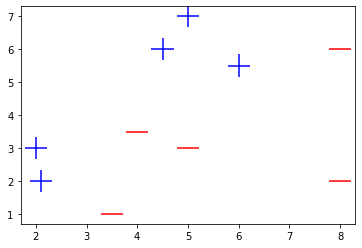

In [5]:
plt.scatter(positives['x1'], positives['x2'], marker='+', s=500*abs(positives['Decision']), c='blue')
plt.scatter(negatives['x1'], negatives['x2'], marker='_', s=500*abs(negatives['Decision']), c='red')
plt.show()

## Une souche d'arbre de décision: decision stump

Classifieur lineaire, et les données ici ne sont pas lineairement séparables, d'où le nom de weak learner (le modèle ne sera pas capable de correctement classifier toutes les instances à l'aide d'une droite)

Un noeud et deux feuilles

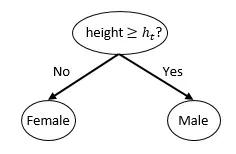

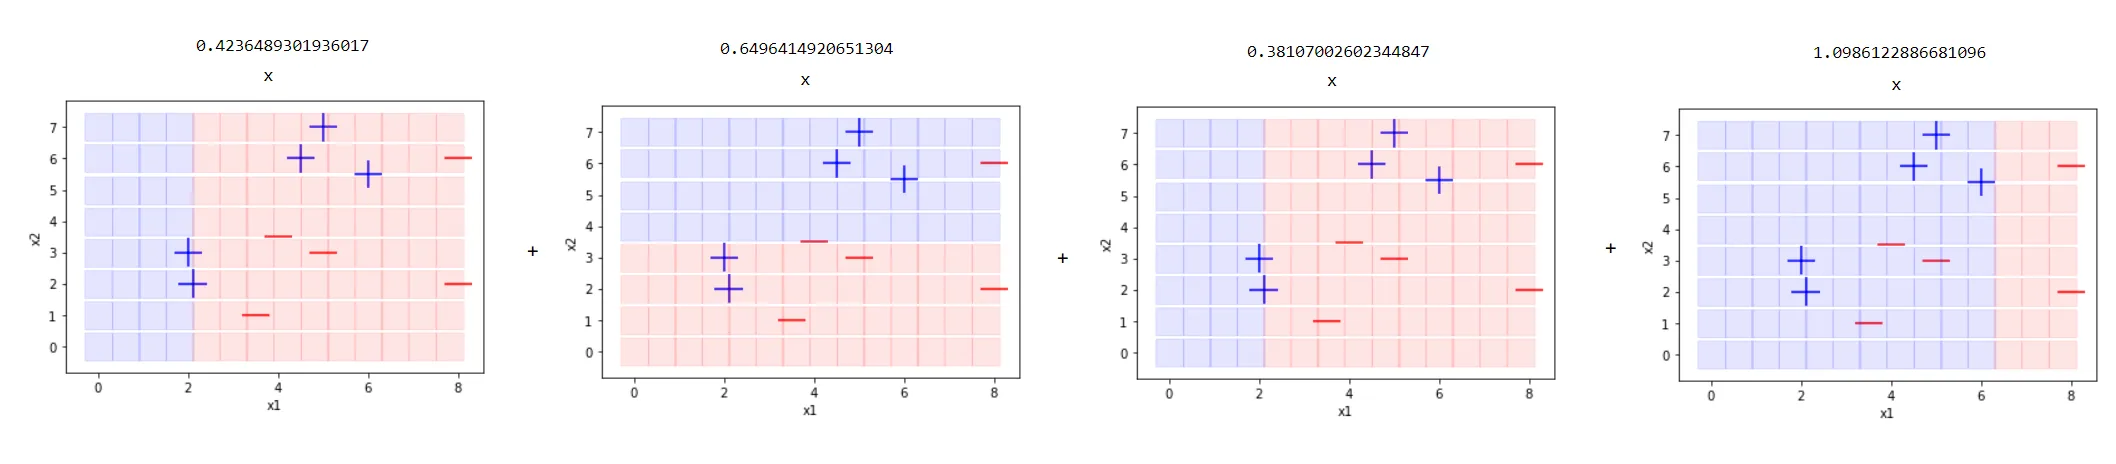

## Prédiction final avec les 4 prédicteurs

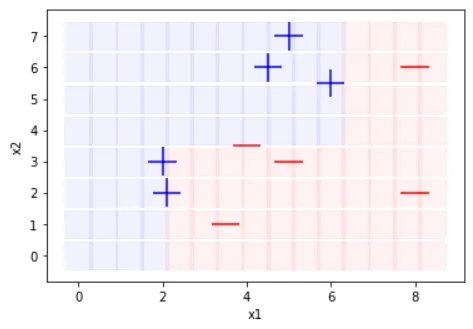

Exemple avec l'instance 1:

prediction_finale = 0.42x1+0.64x-1+0.38x1+1.09x1

Utilisation de la fonction sign:
- si x < 0 alors -1
- si x > 0 alors 1

In [6]:
0.42*1+0.64*-1+0.38*1+1.09*1

1.25

## Implémentation d'un AdaBoostClassifier avec Scikit-Learn

[AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Hyperparamètres:
- base_estimator: Selectionner un weak learner: 
- n_estimators: nombre de prédicteurs
- learning_rate: shrink l'importance des poids

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
model = AdaBoostClassifier(n_estimators=50)

In [47]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [48]:
y_pred = model.predict(X_test)

In [49]:
model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [51]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[10  0  0]
 [ 0 15  0]
 [ 0  3 17]]


<AxesSubplot:>

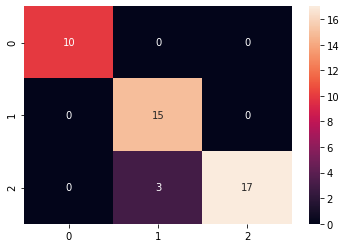

In [52]:
sns.heatmap(cf_matrix, annot=True)

Si l'ensemble AdaBoost surajuste le jeu d'entrainement, on peut essayer de réduire le nombre d'estimateurs où de régulariser plus fortement l'estimateur de base.

L'inconvénient majeur d'AdaBoost est que c'est une techique d'apprentissage séquentiel et donc qu'il ne peut pas être parallélisable, car chaque prédicteur ne peut être entrainé qu'après que le prédicteur précédent a été entrainé et évalué.
Par conséquent, cette méthode ne s'adapte pas si facilement aux données de grande taille que le bagging et le pasting.